In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [134]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

# scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

x.shape
y.shape

(569,)

# SVC with linear kernel

In [135]:
loss, accuracy, precision, recall, f1, cnf_matrix = ([] for i in range(6))

for k in range(1,31):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  classifier = SVC(kernel='linear')
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)
  loss.append(metrics.log_loss(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recall.append(metrics.recall_score(y_test, y_pred))
  f1.append(metrics.f1_score(y_test, y_pred))
  cnf_matrix.append(confusion_matrix(y_test, y_pred))

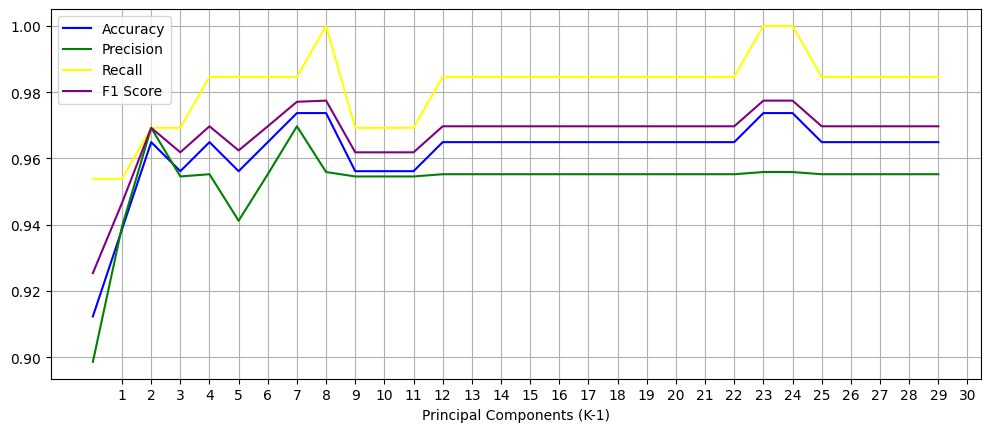

In [136]:
# plt.plot(loss, label='Loss', color='red')
plt.plot(accuracy, label='Accuracy', color='blue')
plt.plot(precision, label='Precision', color='green')
plt.plot(recall, label='Recall', color='yellow')
plt.plot(f1, label='F1 Score', color='purple')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,31))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()

In [137]:
print('Scores for K=24 & 25:')
print(f'Loss: {loss[23]}')
print(f'Accuracy: {accuracy[23]}')
print(f'Precision: {precision[23]}')
print(f'Recall: {recall[23]}')
print(f'F1 score: {f1[23]}')

Scores for K=24 & 25:
Loss: 0.9485171944504516
Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0
F1 score: 0.9774436090225563


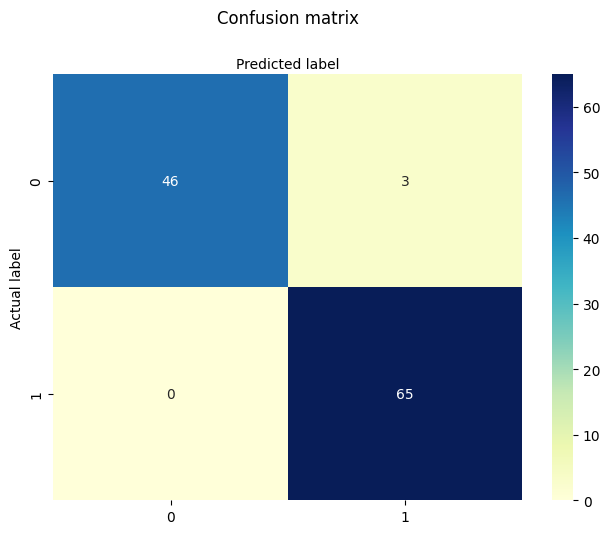

In [138]:
# confusion matrix for K=24 & K=25
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix[23]), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# SVC with RBF kernel

In [139]:
loss, accuracy, precision, recall, f1, cnf_matrix = ([] for i in range(6))

for k in range(1,31):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  classifier = SVC(kernel='rbf')
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)
  loss.append(metrics.log_loss(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recall.append(metrics.recall_score(y_test, y_pred))
  f1.append(metrics.f1_score(y_test, y_pred))
  cnf_matrix.append(confusion_matrix(y_test, y_pred))

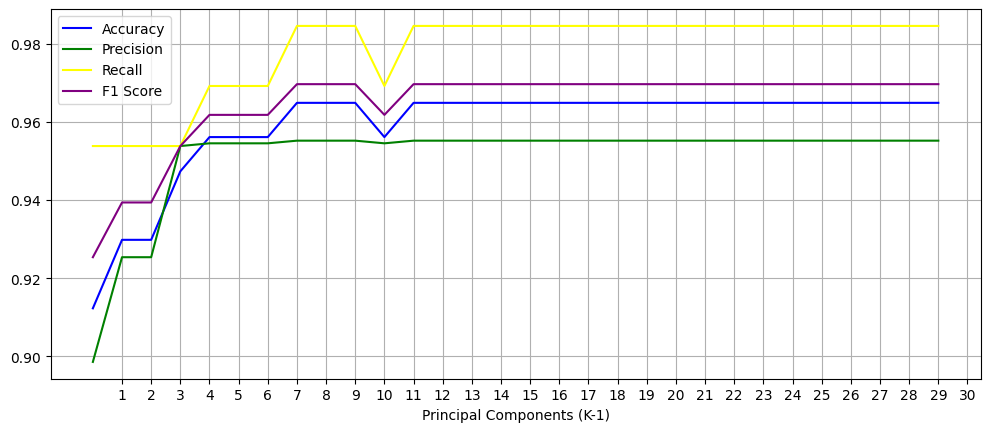

In [140]:
# plt.plot(loss, label='Loss', color='red')
plt.plot(accuracy, label='Accuracy', color='blue')
plt.plot(precision, label='Precision', color='green')
plt.plot(recall, label='Recall', color='yellow')
plt.plot(f1, label='F1 Score', color='purple')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,31))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()

In [141]:
print('Scores for K=12 through 30:')
print(f'Loss: {loss[11]}')
print(f'Accuracy: {accuracy[11]}')
print(f'Precision: {precision[11]}')
print(f'Recall: {recall[11]}')
print(f'F1 score: {f1[11]}')

Scores for K=12 through 30:
Loss: 1.2646895926006019
Accuracy: 0.9649122807017544
Precision: 0.9552238805970149
Recall: 0.9846153846153847
F1 score: 0.9696969696969697


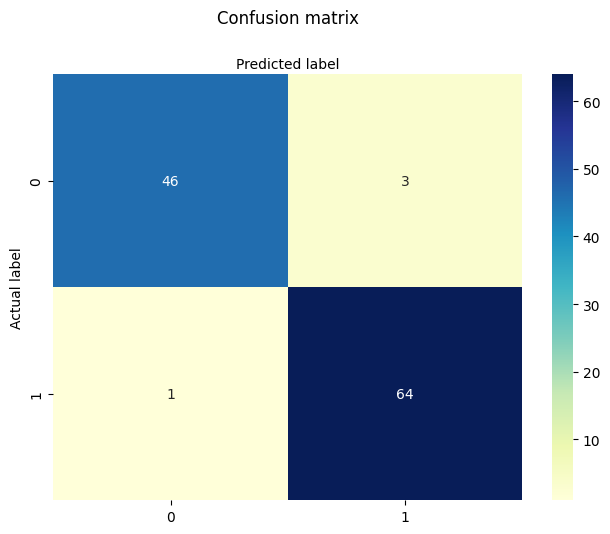

In [142]:
# confusion matrix for K=12 through K=30
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix[11]), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# SVC with polynomial kernelization

In [143]:
loss, accuracy, precision, recall, f1, cnf_matrix = ([] for i in range(6))

for k in range(1,31):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  classifier = SVC(kernel='poly', degree=2)
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)
  loss.append(metrics.log_loss(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recall.append(metrics.recall_score(y_test, y_pred))
  f1.append(metrics.f1_score(y_test, y_pred))
  cnf_matrix.append(confusion_matrix(y_test, y_pred))

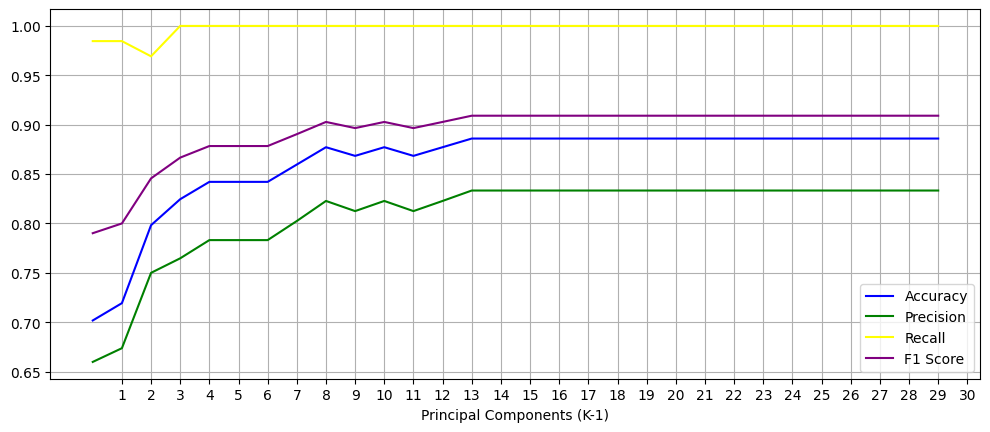

In [144]:
# plt.plot(loss, label='Loss', color='red')
plt.plot(accuracy, label='Accuracy', color='blue')
plt.plot(precision, label='Precision', color='green')
plt.plot(recall, label='Recall', color='yellow')
plt.plot(f1, label='F1 Score', color='purple')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,31))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()

In [145]:
print('Scores for K=6:')
print(f'Loss: {loss[5]}')
print(f'Accuracy: {accuracy[5]}')
print(f'Precision: {precision[5]}')
print(f'Recall: {recall[5]}')
print(f'F1 score: {f1[5]}')

Scores for K=6:
Loss: 5.6911031667027085
Accuracy: 0.8421052631578947
Precision: 0.7831325301204819
Recall: 1.0
F1 score: 0.8783783783783784


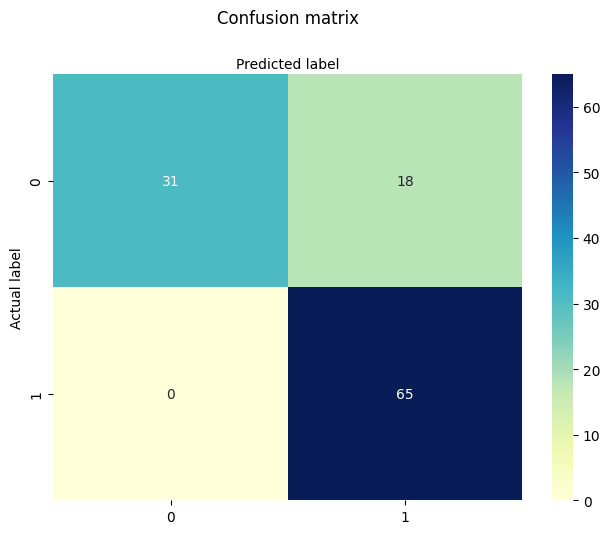

In [146]:
# confusion matrix for K=6
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix[5]), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()